##  Consumers' Purchase Behaviors under influences of incentives of card & loyalty


The research question, this project tries to address, is

How to create more sales by providing various incentives to consumers? 

Two incentives, card and loyalty, are provided in the data used here. This project wants to find out 
whether consumers with card_on_file buy more than people without. It also wants to know whether consumers 
in loyalty program buy more than people not in loyalty program.


# Rollout Plan

To collect data unbiasedly, the company randomly gives customers cards across age and gender.It also randomly gives out loyalty across age and gender. The company collects all purchase data from its customers. wrong data

# Considerations for preventing biases:

# Sampling Bias:

        To avoid gender bias, the customers sample includes nearly the same number of male & female. Also customers
        span evenly over ages.
        
# Selection Bias:

        Before giving out cards and loyalty, breaking the customers along gender line and age buckets, like 0-10,
        10-20, 20-30, 30-50, 50-70. Randomly picking number of people proportionally to the subgroup size and giving
        card. Repeating the same process and giving out loyalty.
   

# The dataset used is   

        .../data-201-resources-master/customers_data.csv

         With it, cleaning up data by removing wrong values, like negative ages, negative purchase amount
         
         Scan-plotting the data to verify data is reasonable.



# A/B tests 1 will be performed on 
Control sample where customers are without card on file. 
Test sample where customers are with card on file. 

# A/B tests 2 will be performed on 
Control sample where customers do not have loyalty.
Test sample where customers do have loyalty.

# Hypothesis of A/B test 1:
	Customers with cards on file will purchase more than customers without ones.
    
# Null hypothesis of A/B test 1:
	Customers with cards on file will purchase the same amount as customers without ones.

# Key metrics:  
	The average purchase amount of control sample & test sample

            Additional metrics can be performed by breaking data sample along gender line.
            Or breaking data into age groups.
	
TTest:   
	Perform ttest, and pvalue set at 0.05.



# Hypothesis of A/B test 2:
	Customers with loyalty will purchase more than customers without ones.
    
# Null hypothesis of A/B test 2:
	Customers with loyalty will purchase the same amount as customers without ones.

# Key metrics:  
	The average purchase amount of control sample & test sample

            Additional metrics can be performed by breaking data sample along gender line.
            Or breaking data into age groups.
	
TTest:   
	Perform ttest, and pvalue set at 0.05.
    
    
## Evaluation Plan:

If pvalue < 0.05,   the difference experiment gets very significant.




In [53]:
# import python library packages
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
from matplotlib import pyplot as plt
%matplotlib inline

## setup user_defined utility functions

In [54]:
# return bool value for float, True for non-negative or False for negative
def retrieveNonNegative(x):
    return (x >= 0)

In [55]:
# return bool list for list of float values, True for non-negative or False for negative
def retrieve_NonNegative_list(lst):
    new_list = []
    for x in lst:
        new_list.append(x >= 0)
    return new_list

In [56]:
# return bool value for string, True for 'yes' or False for other
def retrieve_item_yes(x):
    return (str(x) == 'yes')

In [57]:
# return bool value for string, True for 'no' or False for other
def retrieve_item_no(x):
    return (str(x) == 'no')

In [58]:
# return bool list for list of bool values, True for 'no' or False for other
def retrieve_item_false_list(lst):
    new_list = []
    for x in lst:
        new_list.append(not x)
    return new_list

In [59]:
# return new DataFrame with filter func
def dataFrame_filter_row(df, colname, func):
    filter_list = func(df[colname])
    return df[(filter_list)]

##  read in data
>

In [60]:
# load csv file into DataFrame
df_customer = pd.read_csv("../data-201-resources-master/customers_data.csv")

In [61]:
# have quick view of DataFrame
df_customer.head(4)

,Unnamed: 0,purch_amt,gender,card_on_file,age,days_since_last_purch,loyalty
0,0,19.58,male,no,31.0,35.0,False
1,1,65.16,male,yes,23.0,61.0,False
2,2,40.60,female,no,36.0,49.0,False
3,3,38.01,male,yes,47.0,57.0,False


## clean negative values, NA,  until values look reasonable.

>

In [62]:
print('removing negative age......')
df_temp = df_customer[retrieve_NonNegative_list(df_customer['age'])] 
print('removing negative purchase amount......')                         
df = df_temp[retrieve_NonNegative_list(df_temp['purch_amt'])]

removing negative age......
removing negative purchase amount......


## verify the data are in the reasonable range 
>

In [63]:
print('The gender')
print(df['gender'].sort_values(ascending=True).unique())
print('The card_on_file')
print(df['card_on_file'].sort_values(ascending=True).unique())
print('The bool values of loyalty')
print(df['loyalty'].sort_values(ascending=True).unique())
print('The minimum purchase amount is {}'.format(df['purch_amt'].sort_values(ascending=True).min()))
print('The maximum purchase amount is {}'.format(df['purch_amt'].sort_values(ascending=True).max()))
print('The minimum age is {}'.format(df['age'].sort_values(ascending=True).min()))
print('The maximum age is {}'.format(df['age'].sort_values(ascending=True).max()))
print('The minimum days_since_last_purch is {}'.format(df['days_since_last_purch'].sort_values(ascending=True).min()))
print('The maximum days_since_last_purch is {}'.format(df['days_since_last_purch'].sort_values(ascending=True).max()))

The gender
['female' 'male']
The card_on_file
['no' 'yes']
The bool values of loyalty
[False  True]
The minimum purchase amount is 0.01
The maximum purchase amount is 142.2
The minimum age is -0.0
The maximum age is 71.0
The minimum days_since_last_purch is -9.0
The maximum days_since_last_purch is 125.0


## during rollout, the data is collected unbiased over gender and age.

     The first plots show the purchase amount distribution breaking by gender. Statistically
     the distributions are similar.
     
     The second plots show distribution of averaged purchase amount over age. It is pretty flat,
     no clear bias for specific age group.
     

<Figure size 1440x1080 with 0 Axes>

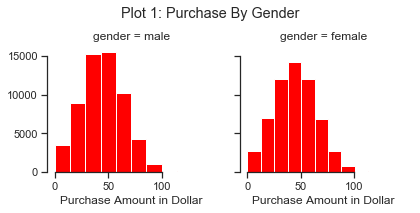

In [64]:
# make 1st plot
plt.figure(figsize=(20,15))
sns.set(style="ticks")
graph = sns.FacetGrid(df, col="gender")
graph.map(plt.hist, "purch_amt", color="red")
plt.subplots_adjust(top=0.8)
graph.set_axis_labels("Purchase Amount in Dollar")
plt.suptitle("Plot 1: Purchase By Gender")
sns.despine(trim=True)
plt.show()

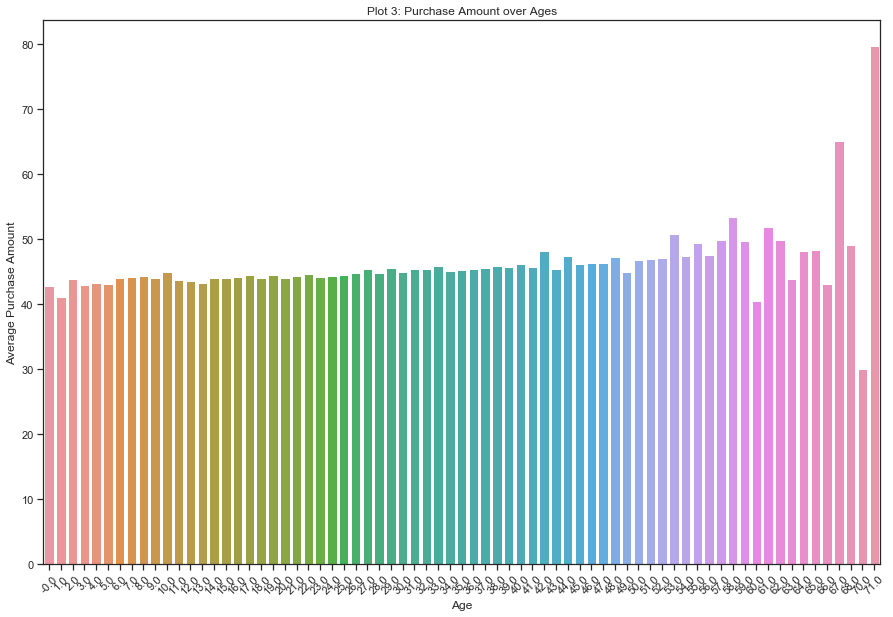

In [65]:
# make 2nd plot
df_agesort = df.groupby(['age']).mean()
temp = df['age'].sort_values(ascending=True).unique()
df_agesort['age'] = temp

plt.figure(figsize=(15,10))
sns.barplot(x=df_agesort['age'], y=df_agesort['purch_amt'])
plt.xticks(rotation=45)
plt.xlabel('Age')
plt.ylabel('Average Purchase Amount')
plt.title('Plot 3: Purchase Amount over Ages')
plt.show()

## Hypothesis A/B test 1:     
##       Does card_on_file make significant difference in customers' purchase amount?
>

In [66]:
# create subset DataFrame
df_card_yes = df[df['card_on_file'] == 'yes']
df_card_no = df[df['card_on_file'] == 'no']

In [67]:
print('The purchase mean of customers with card_on_file = {}'.format(df_card_yes['purch_amt'].mean()))
print('The purchase distribution Standard deviation of customers with card_on_file = {}'.format(df_card_yes['purch_amt'].std()))
print('The purchase mean of customers without card_on_file = {}'.format(df_card_no['purch_amt'].mean()))
print('The purchase distribution Standard deviation of customers without card_on_file = {}'.format(df_card_no['purch_amt'].std()))

The purchase mean of customers with card_on_file = 44.817038636093386
The purchase distribution Standard deviation of customers with card_on_file = 19.649348766563353
The purchase mean of customers without card_on_file = 44.8520277744687
The purchase distribution Standard deviation of customers without card_on_file = 19.540184921478332


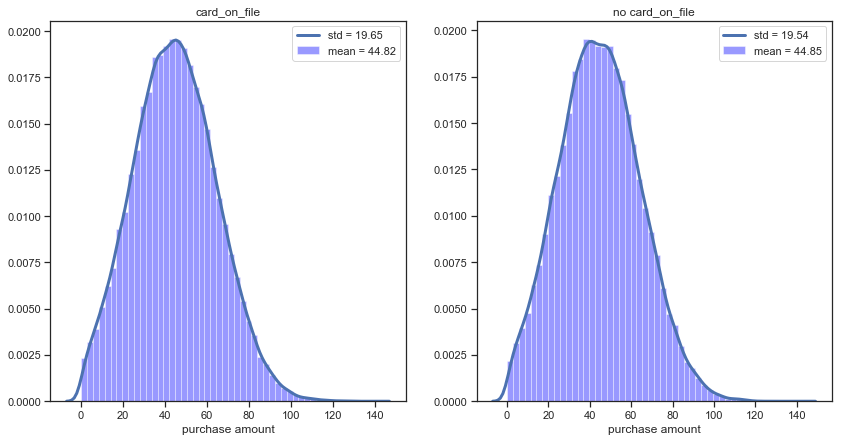

In [68]:
# Plot distribution of purchase_amount for two subsets, with and without card_on_file
plt.figure(figsize=(14,7))
plt.subplot(1, 2, 1)
graph = sns.distplot(np.array(df_card_yes['purch_amt']), color='blue', axlabel='purchase amount', norm_hist=True,
                    label='mean = 44.82', kde_kws={"color":"b", "lw":3, "label":"std = 19.65"})
plt.legend(loc='upper right')
plt.title('card_on_file')
plt.subplot(1, 2, 2)
graph = sns.distplot(np.array(df_card_no['purch_amt']), color='blue', axlabel='purchase amount', norm_hist=True,
                    label='mean = 44.85', kde_kws={"color":"b", "lw":3, "label":"std = 19.54"})
plt.legend(loc='upper right')
plt.title('no card_on_file')
plt.show()

In [69]:
# perform t-test, calculate pvalue
tval,pval = stats.ttest_ind(df_card_yes['purch_amt'], df_card_no['purch_amt'], equal_var=True)

In [70]:
print(tval)
print(pval)

-0.30615816073773267
0.7594847686874292


##   The card_on_file makes customers' purchase behavior not the same (or different) 
##               only at 24% of confidence level. 
##
##    So the probability of rejecting NULL hypothesis is weak. This experiment result 
##               is inconclusive.
##
>

## Hypothesis A/B test 2:
## Does loyalty make significant difference in customers' purchase amount?
>

In [71]:
# create two subset DataFrames with and without loyalty
df_loyalty_true = df[df['loyalty']]
df_loyalty_false = df[retrieve_item_false_list(df.loyalty)]

In [72]:
print('The purchase mean of customers with loyalty = {}'.format(df_loyalty_true['purch_amt'].mean()))
print('The purchase distribution Standard deviation of customers with loyalty = {}'.format(df_loyalty_true['purch_amt'].std()))
print('The purchase mean of customers without loyalty = {}'.format(df_loyalty_false['purch_amt'].mean()))
print('The purchase distribution Standard deviation of customers without loyalty = {}'.format(df_loyalty_false['purch_amt'].std()))

The purchase mean of customers with loyalty = 54.1889771184309
The purchase distribution Standard deviation of customers with loyalty = 19.724898638070695
The purchase mean of customers without loyalty = 42.93069638196639
The purchase distribution Standard deviation of customers without loyalty = 19.012760677146936


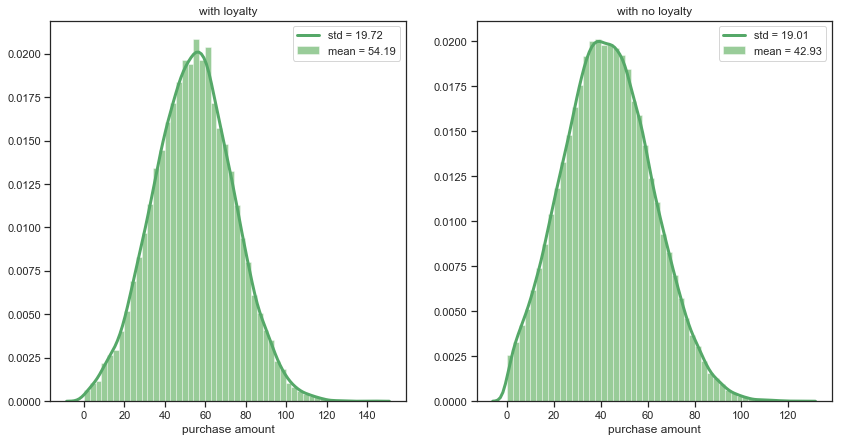

In [73]:
# Plot distribution of purchase_amount for two subsets, with and without loyalty
plt.figure(figsize=(14,7))
plt.subplot(1, 2, 1)
graph = sns.distplot(np.array(df_loyalty_true['purch_amt']), color='green', axlabel='purchase amount', norm_hist=True,
                    label='mean = 54.19', kde_kws={"color":"g", "lw":3, "label":"std = 19.72"})
plt.legend(loc='upper right')
plt.title('with loyalty')
plt.subplot(1, 2, 2)
graph = sns.distplot(np.array(df_loyalty_false['purch_amt']), color='green', axlabel='purchase amount', norm_hist=True,
                    label='mean = 42.93', kde_kws={"color":"g", "lw":3, "label":"std = 19.01"})
plt.legend(loc='upper right')
plt.title('with no loyalty')
plt.show()

In [74]:
# perform t-test, calculate pvalue
tval,pval = stats.ttest_ind(df_loyalty_true['purch_amt'], df_loyalty_false['purch_amt'], equal_var=True)

In [75]:
print(tval)
print(pval)

75.62730011331767
0.0


##   The loyalty makes customers' purchase behavior not the same (or different) 
##               at ~99% of confidence level. 
##
##    So the probability of rejecting NULL hypothesis is extremely strong. This experiment 
##               result shows that loyalty program makes difference at 99% confidence level.
##
>